In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
train_df = pd.read_csv('training_set_features.csv')
train_df_labels = pd.read_csv('training_set_labels.csv')
test_df = pd.read_csv('test_set_features.csv',index_col='respondent_id')
train_df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [45]:
merged_train_df = train_df.merge(train_df_labels, how='inner', on='respondent_id')
merged_train_df.shape

(26707, 38)

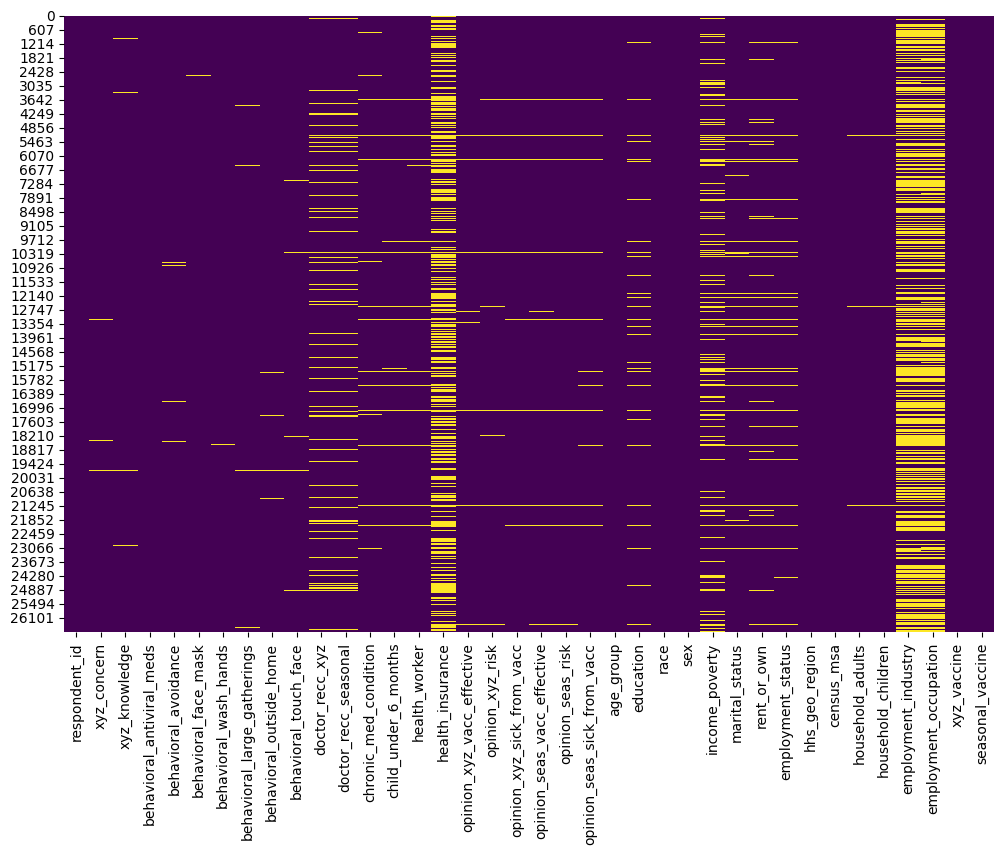

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(merged_train_df.isnull(),cbar=False,cmap='viridis')
plt.show()

In [47]:

both_vax_df = merged_train_df[(merged_train_df['xyz_vaccine'] == 1) & 
                              (merged_train_df['seasonal_vaccine'] == 1)]

both_vax_ratio = both_vax_df.shape[0] / merged_train_df.shape[0] * 100

print(f"Ratio of respondents who received both vaccines: {both_vax_ratio:.2f}%")


Ratio of respondents who received both vaccines: 17.59%


In [48]:

both_vax_df = merged_train_df[(merged_train_df['xyz_vaccine'] == 1) |
                              (merged_train_df['seasonal_vaccine'] == 1)]

both_vax_ratio = both_vax_df.shape[0] / merged_train_df.shape[0] * 100

print(f"Ratio of respondents who received both vaccines: {both_vax_ratio:.2f}%")
print(f"Ratio of respondents who received no vaccines: {100 - both_vax_ratio:.2f}%")

Ratio of respondents who received both vaccines: 50.22%
Ratio of respondents who received no vaccines: 49.78%


In [49]:
print(merged_train_df['xyz_vaccine'].value_counts())
print(merged_train_df['seasonal_vaccine'].value_counts())

xyz_vaccine
0    21033
1     5674
Name: count, dtype: int64
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


In [50]:
merged_train_df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

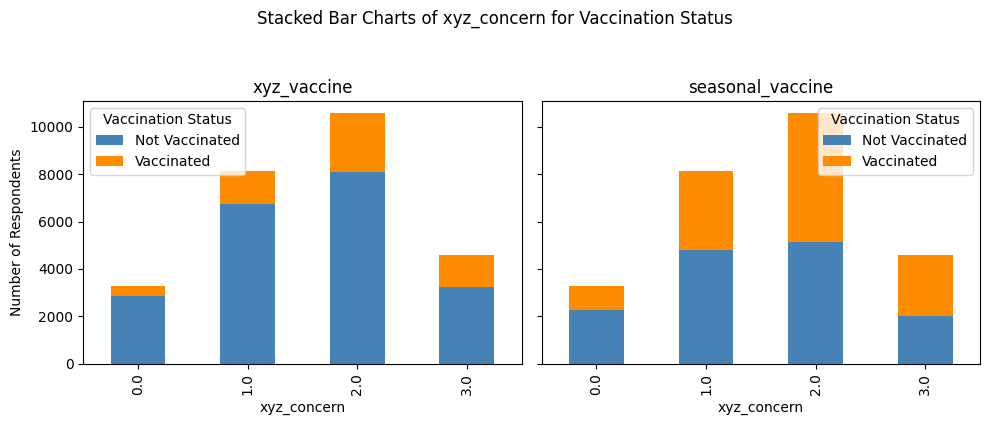

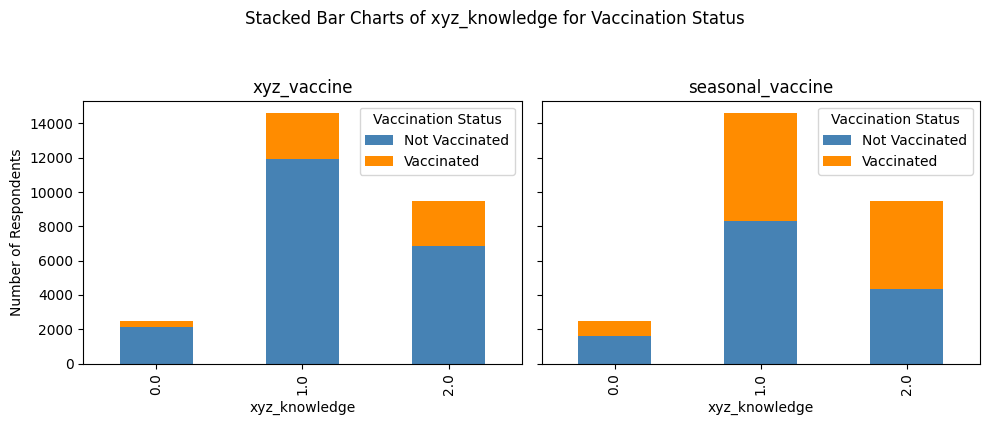

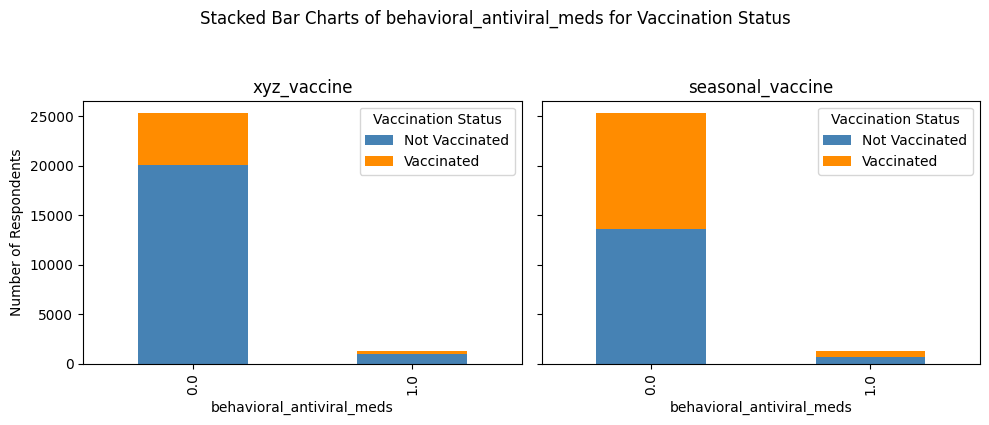

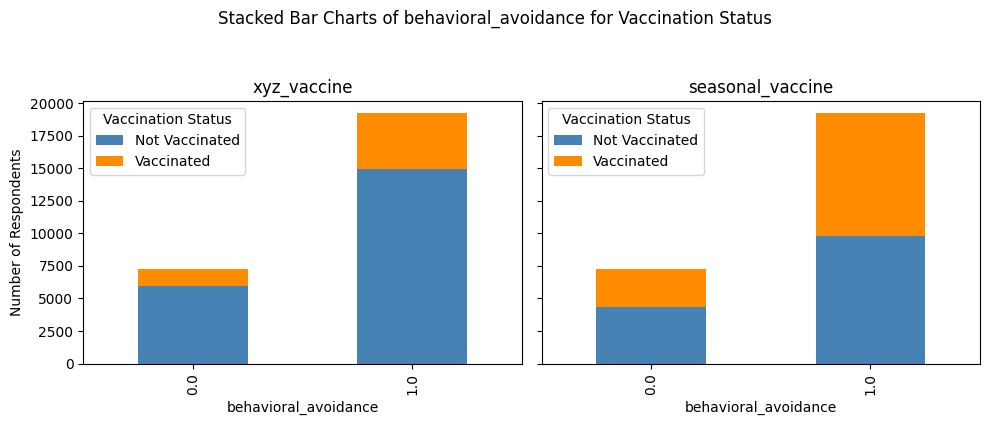

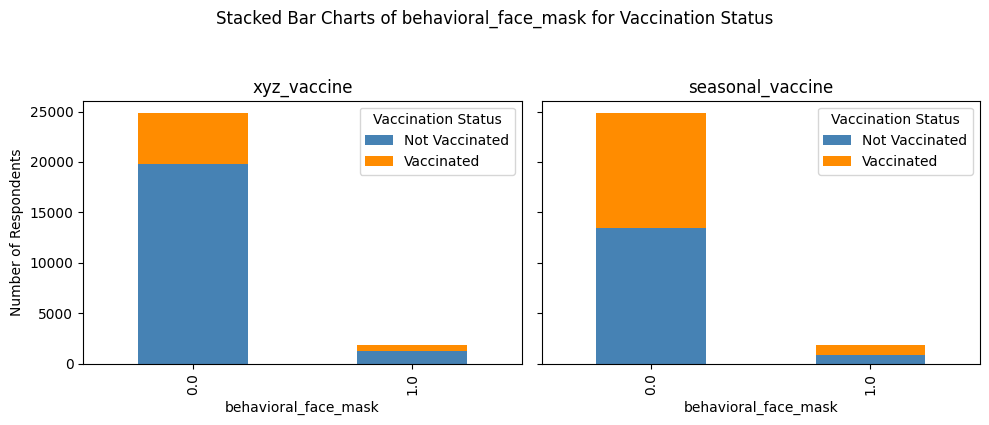

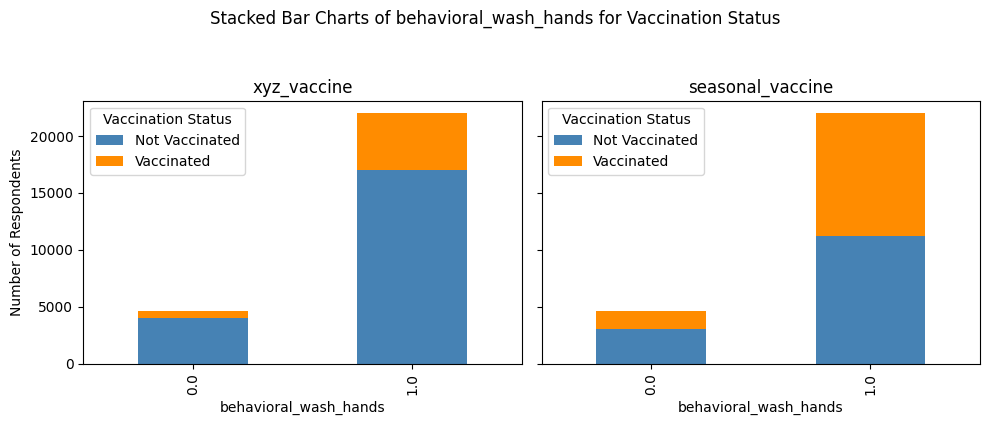

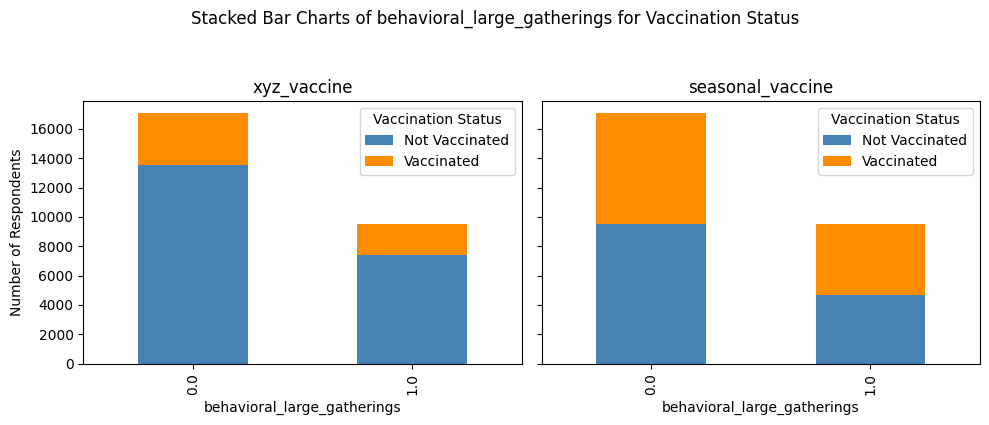

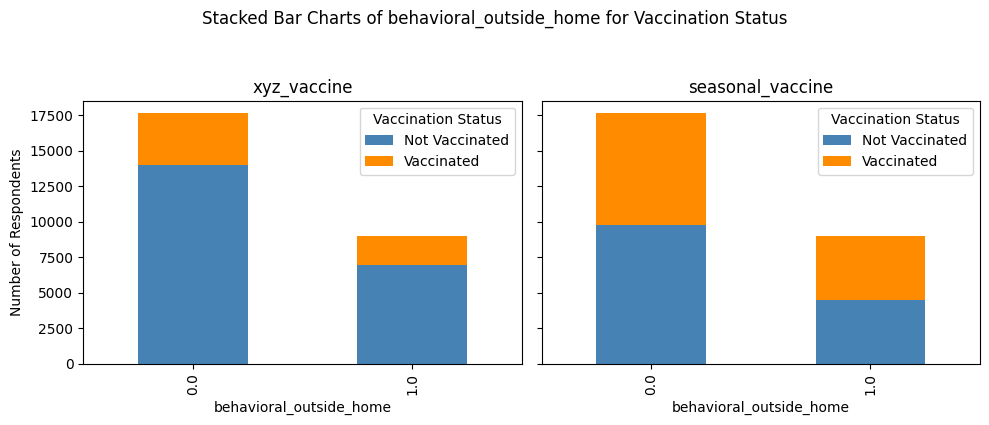

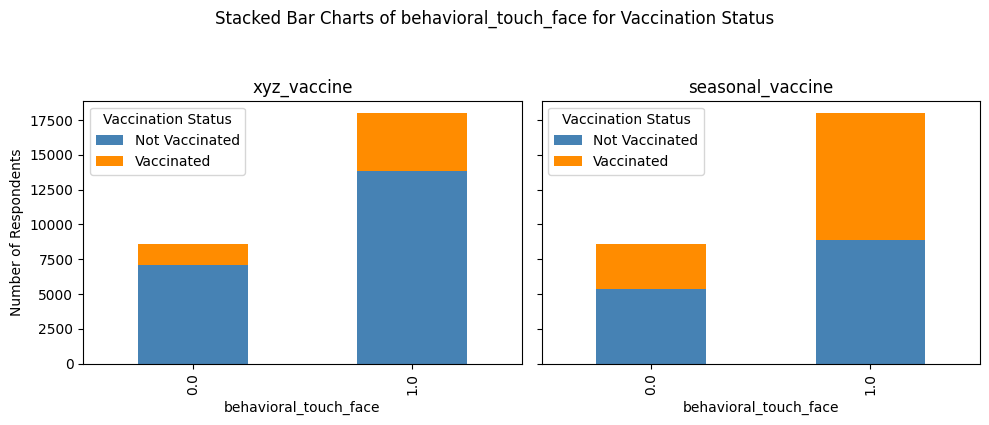

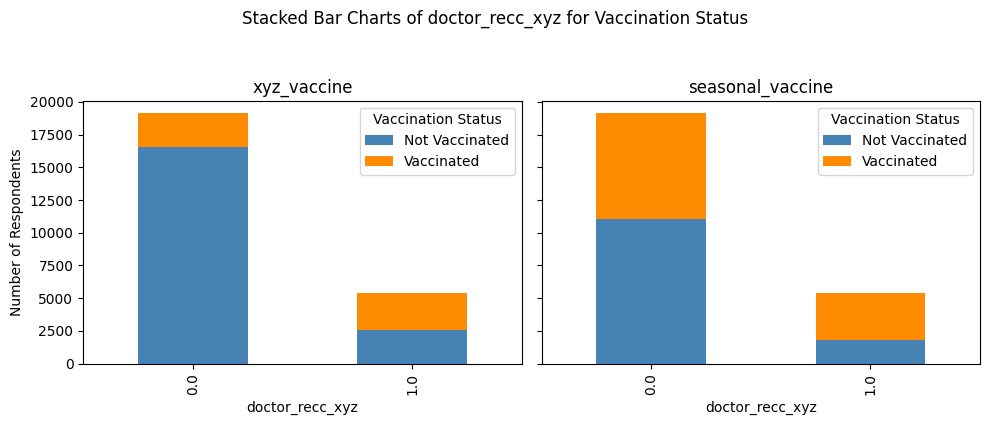

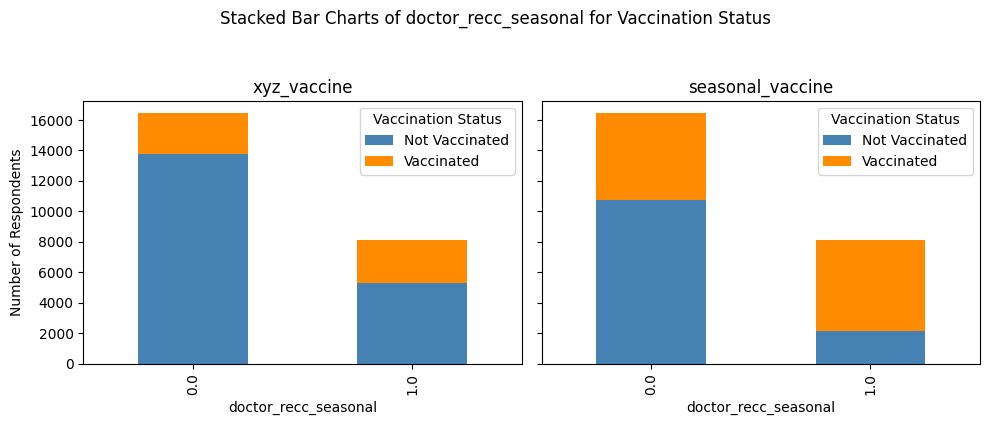

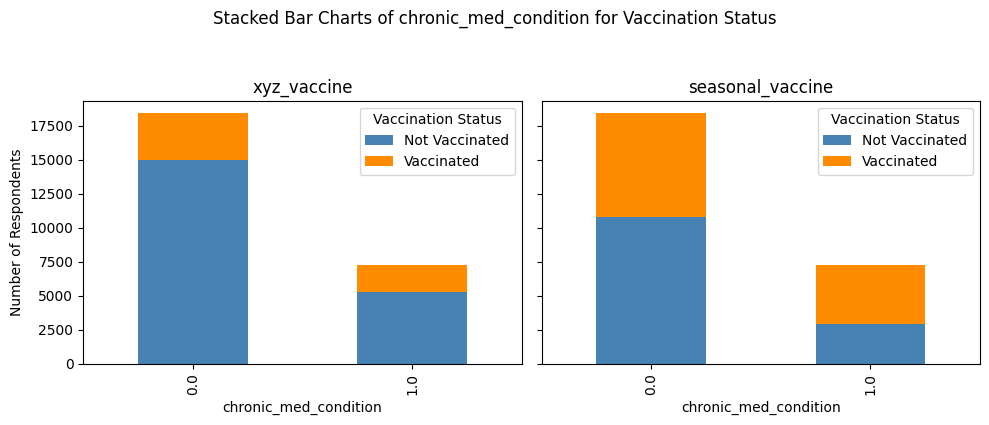

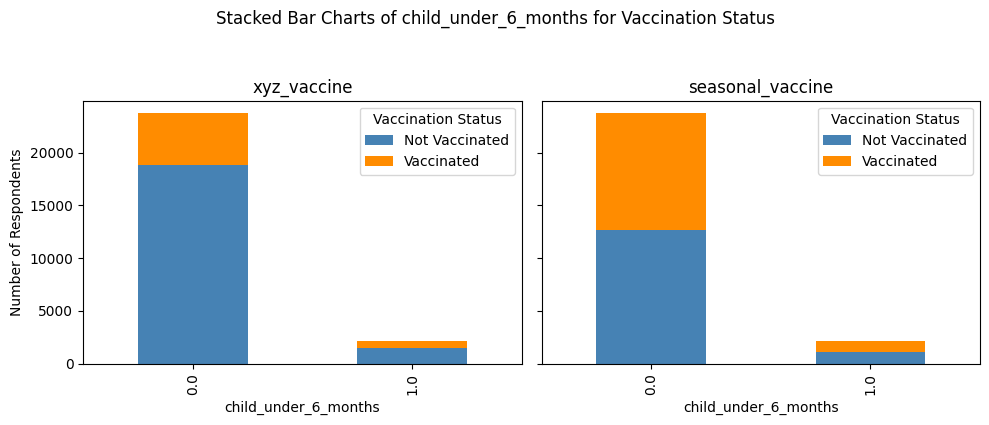

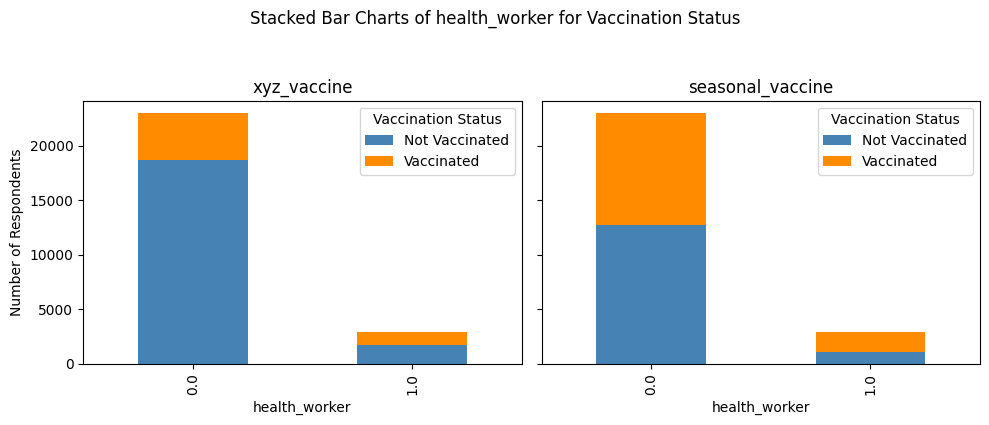

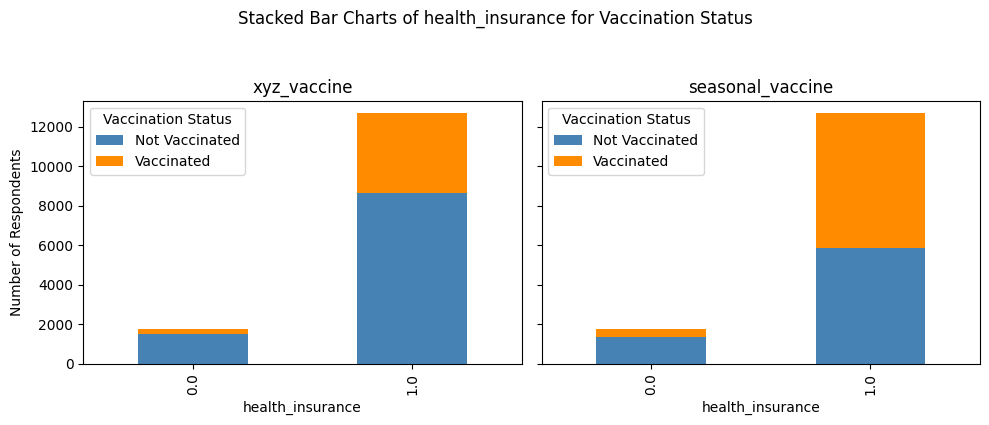

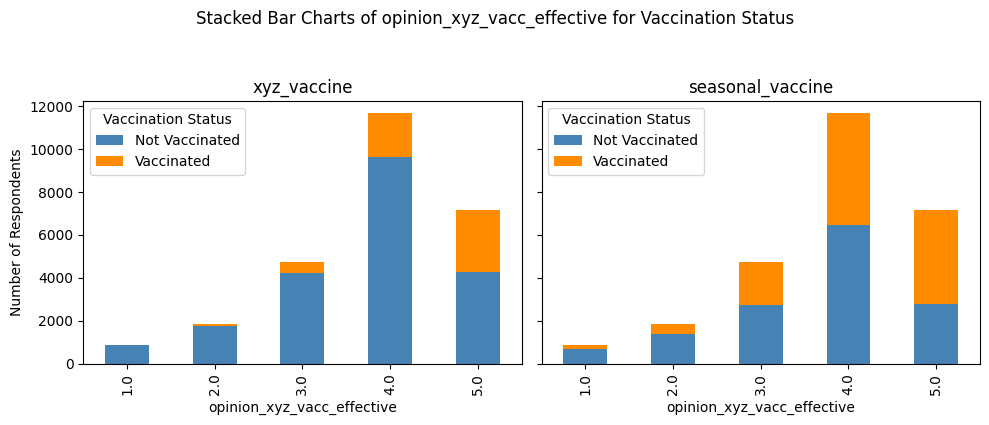

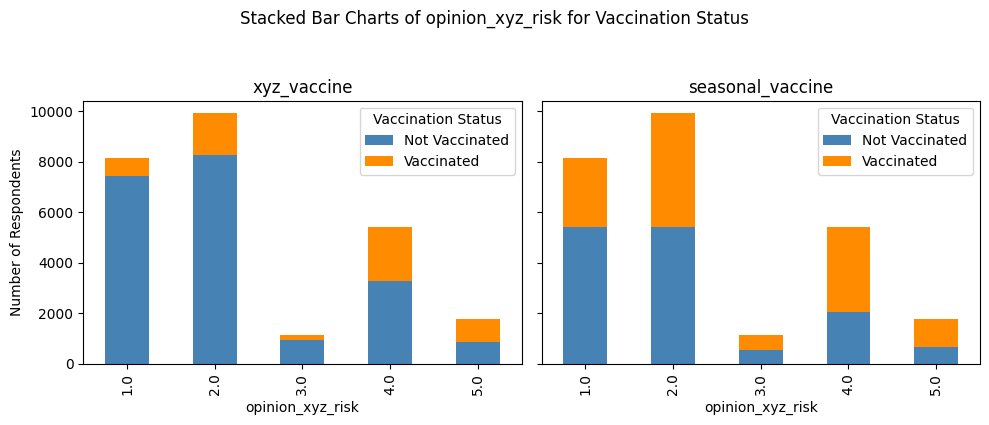

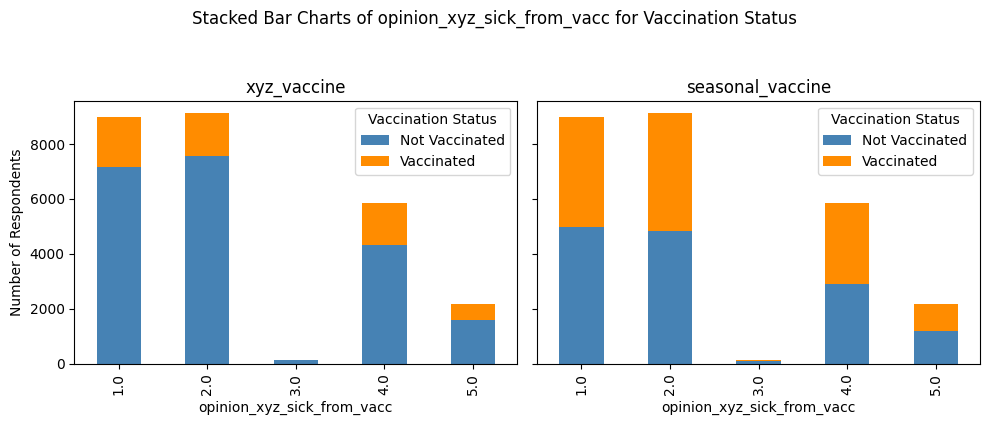

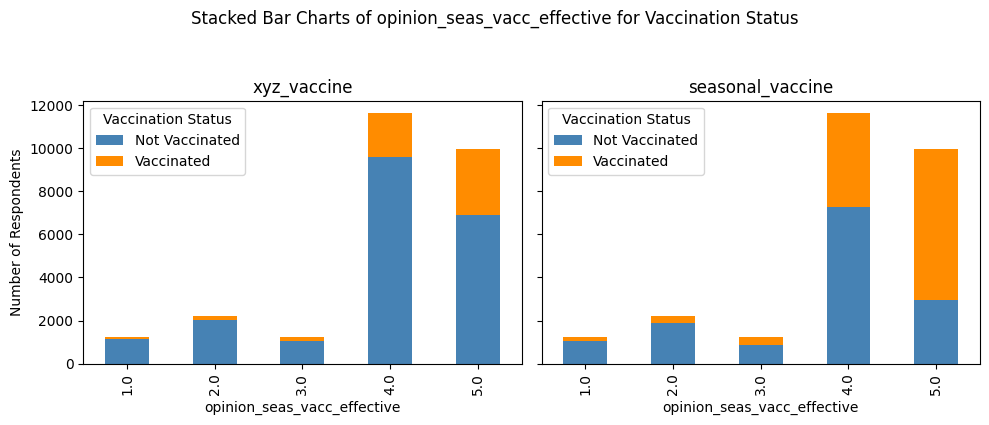

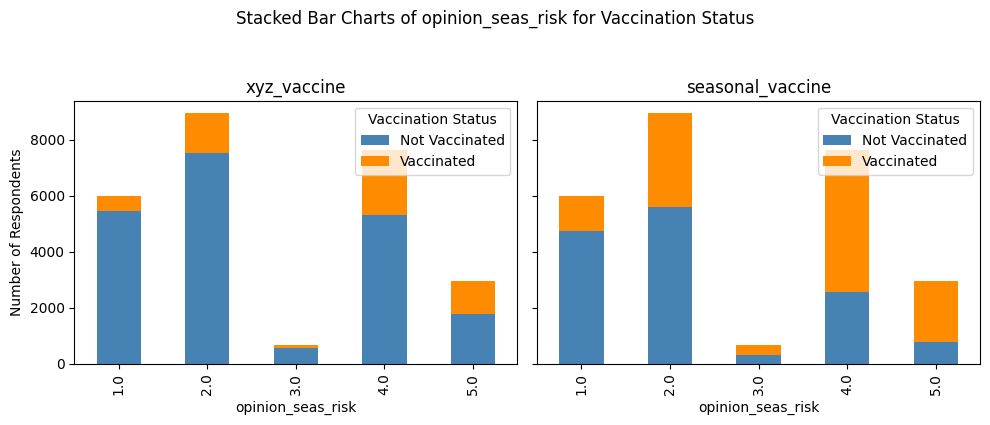

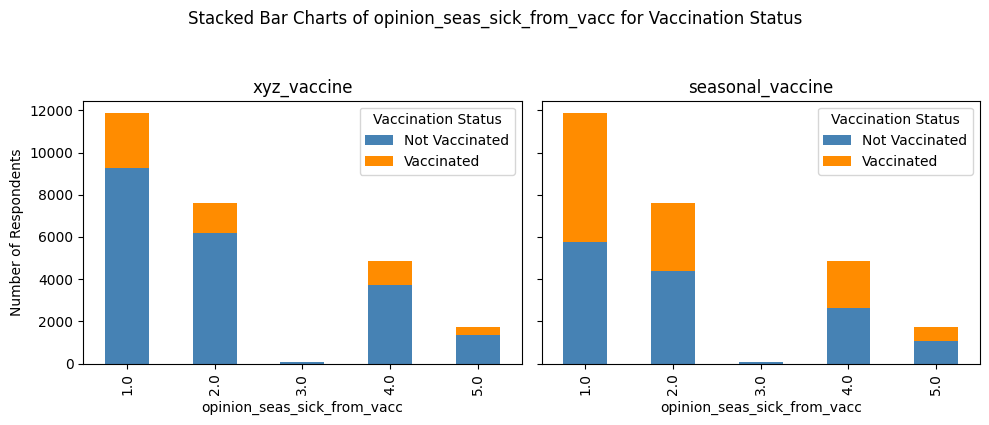

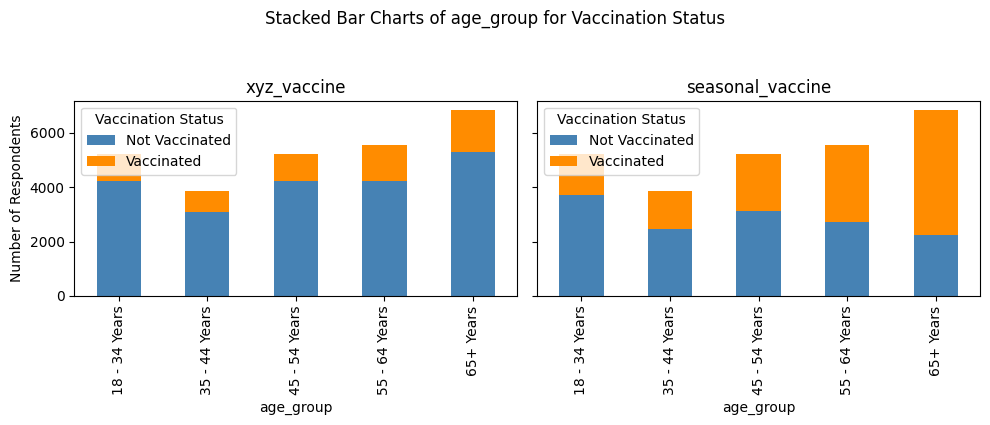

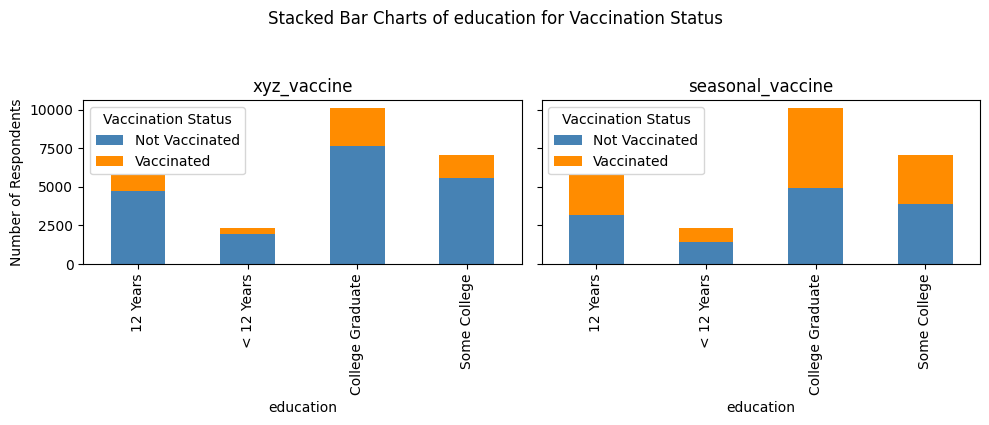

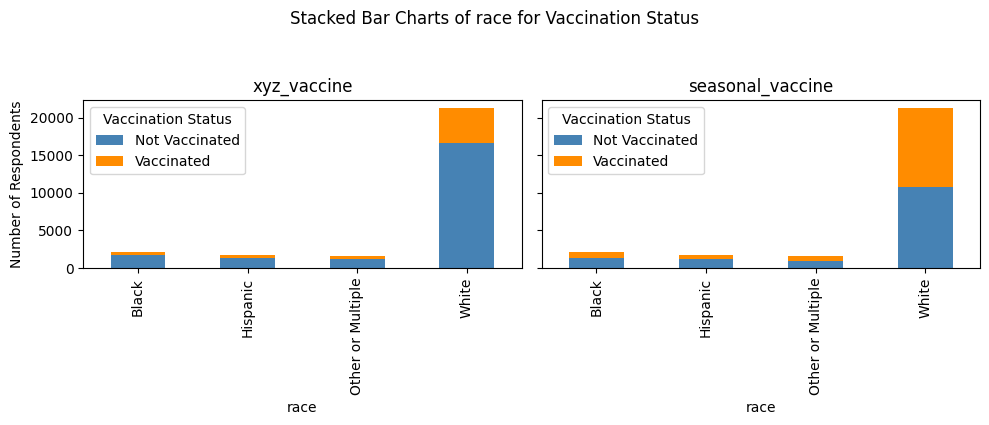

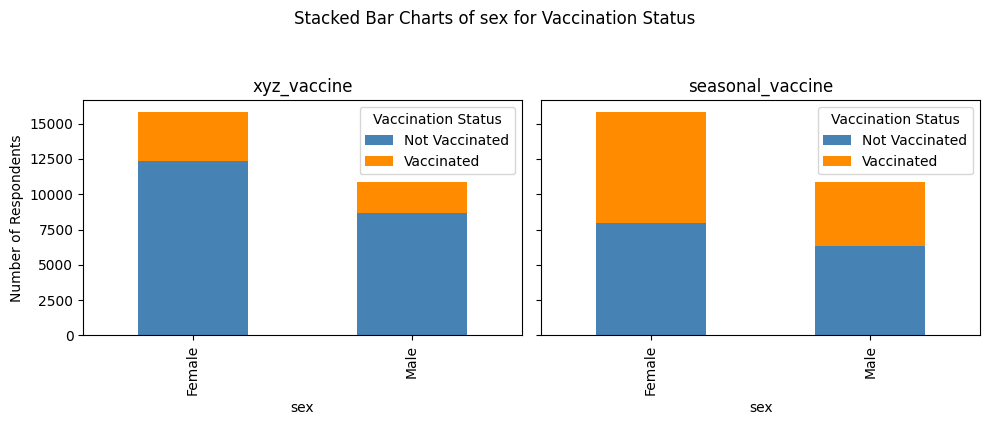

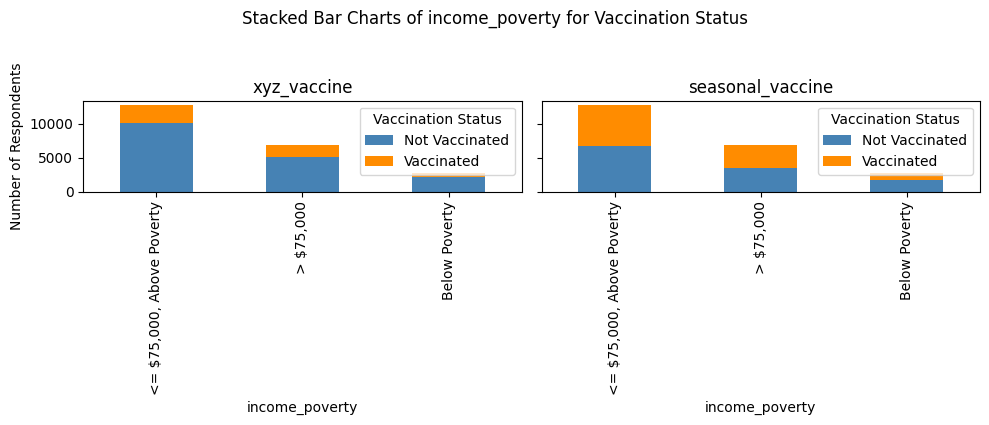

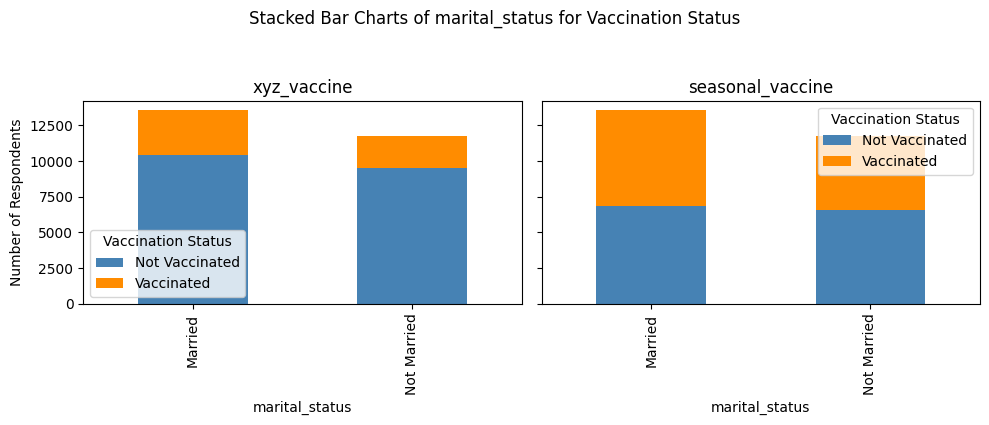

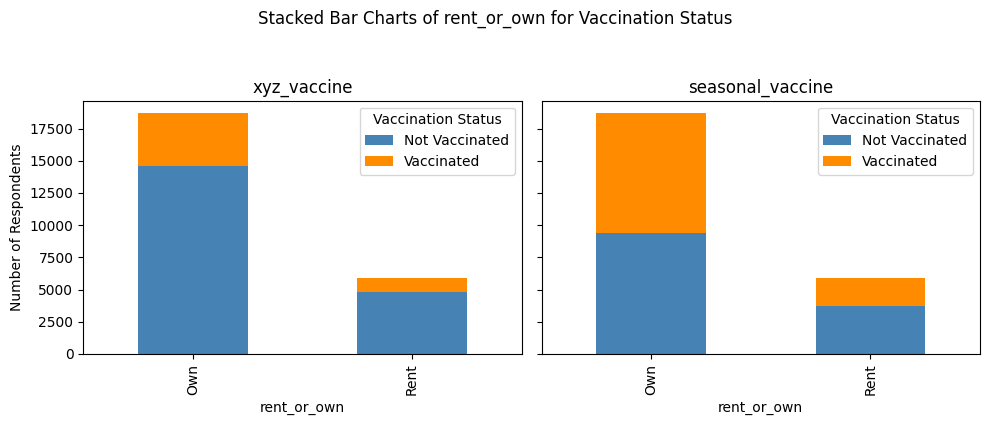

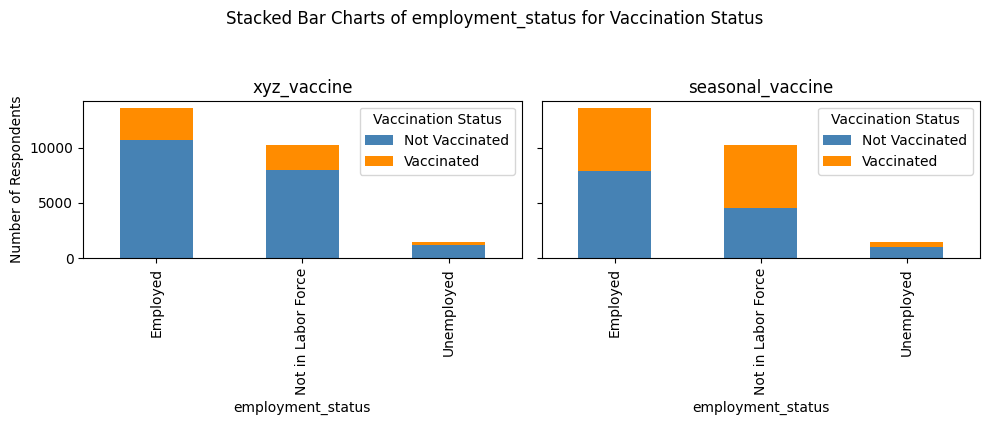

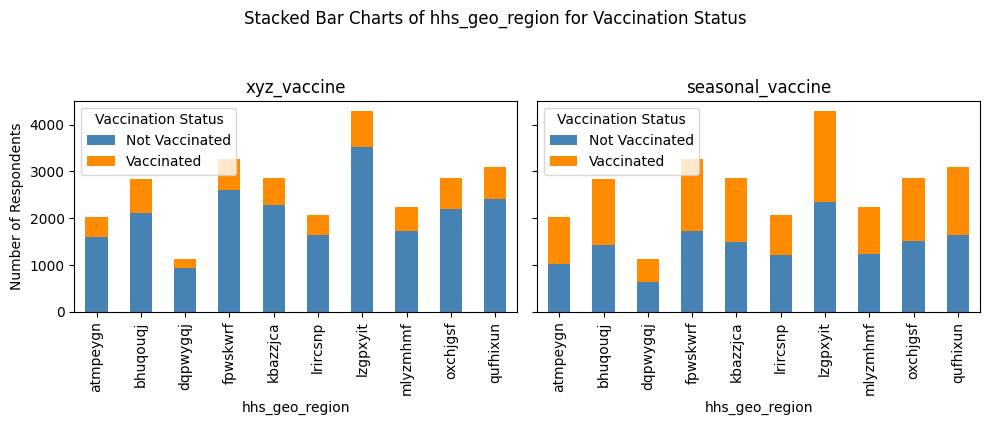

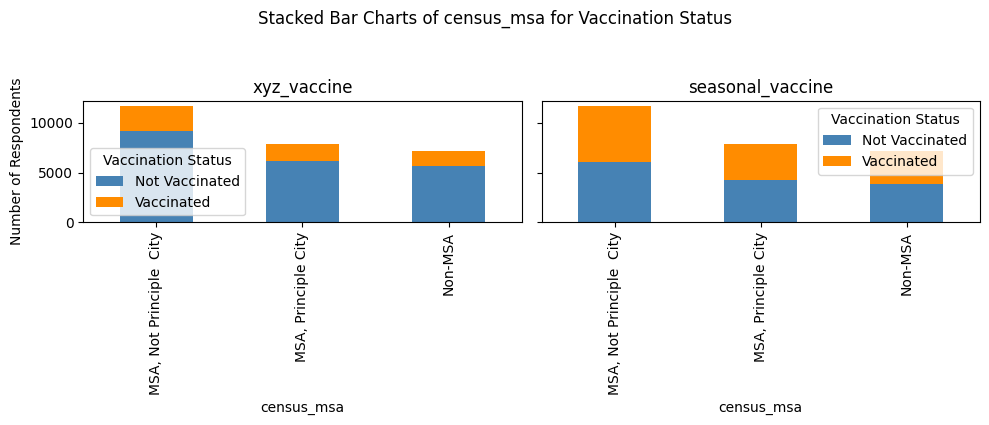

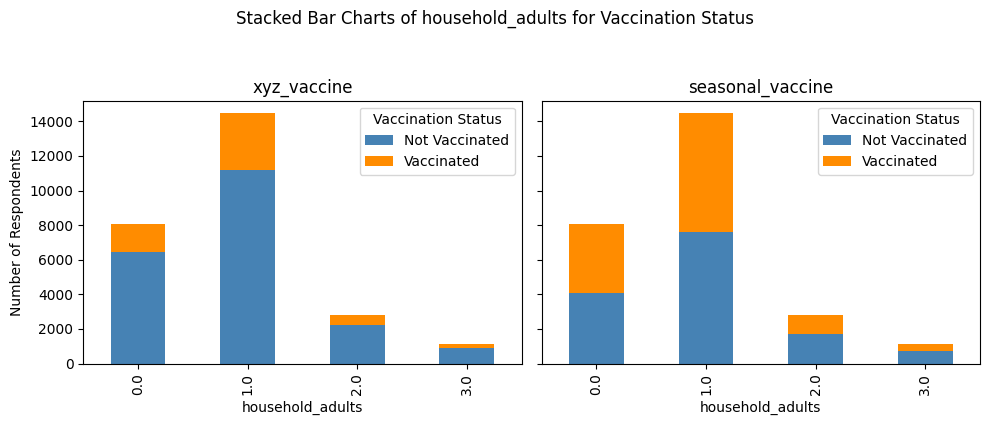

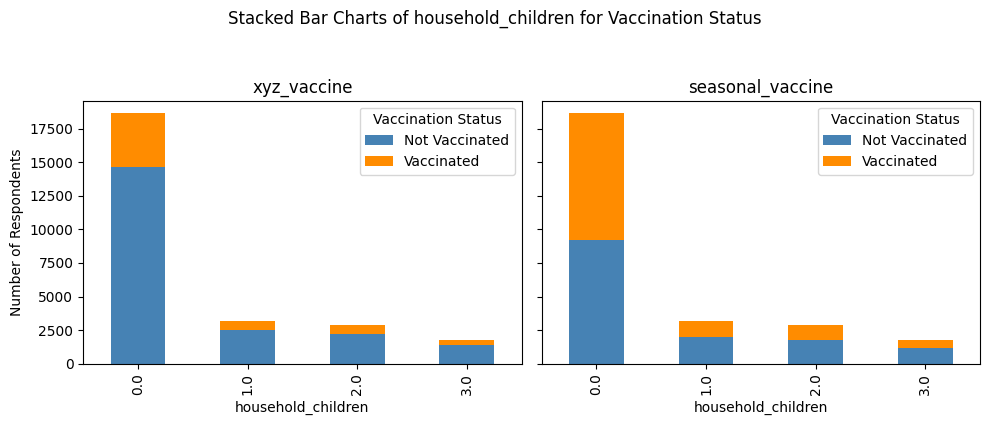

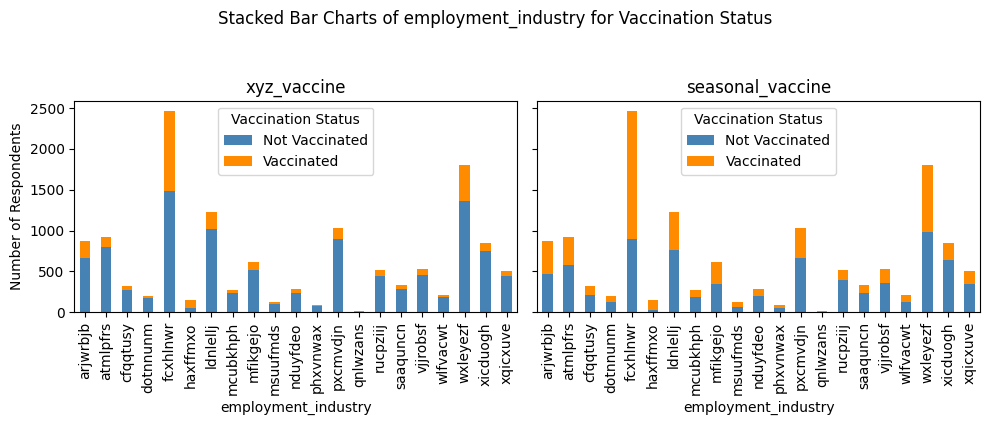

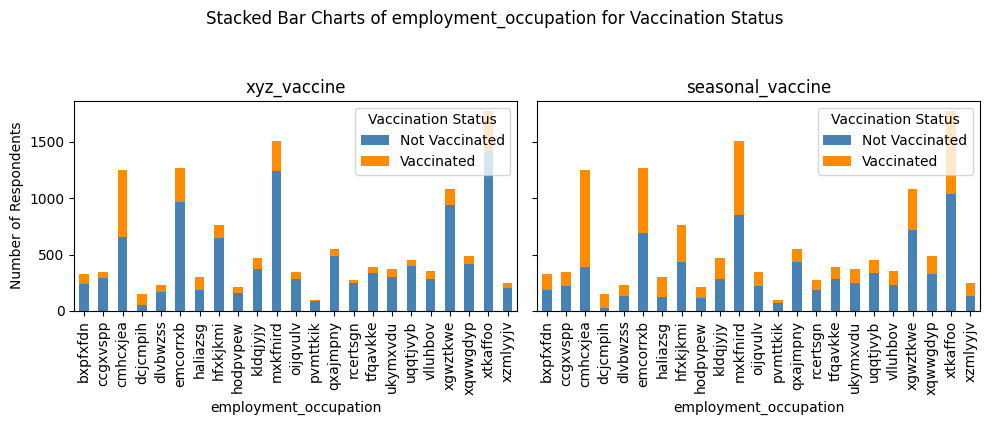

In [51]:
# Define the function to plot stacked bar charts
def plot_stacked_bars(df, column, vaccines=['xyz_vaccine', 'seasonal_vaccine'], ax=None):
    fig, axs = plt.subplots(1, len(vaccines), figsize=(10, 4), sharey=True)
    fig.suptitle(f'Stacked Bar Charts of {column} for Vaccination Status', y=1.05)
    
    for i, vaccine in enumerate(vaccines):
        # Create a crosstab to count occurrences
        crosstab = pd.crosstab(df[column], df[vaccine])
        
        # Plot the stacked bar chart
        crosstab.plot(kind='bar', stacked=True, ax=axs[i], color=['steelblue', 'darkorange'])
        axs[i].set_title(f'{vaccine}')
        axs[i].set_xlabel(column)
        axs[i].set_ylabel('Number of Respondents')
        axs[i].legend(title='Vaccination Status', labels=['Not Vaccinated', 'Vaccinated'])

    plt.tight_layout()
    plt.show()

# Iterate over each column in features_df (excluding 'respondent_id')
for col in train_df.columns:
    if col == 'respondent_id':
        continue
    plot_stacked_bars(merged_train_df, col, vaccines=['xyz_vaccine', 'seasonal_vaccine'])

In [52]:
merged_train_df.age_group.value_counts(ascending=True)

age_group
35 - 44 Years    3848
18 - 34 Years    5215
45 - 54 Years    5238
55 - 64 Years    5563
65+ Years        6843
Name: count, dtype: int64

In [53]:
merged_train_df.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

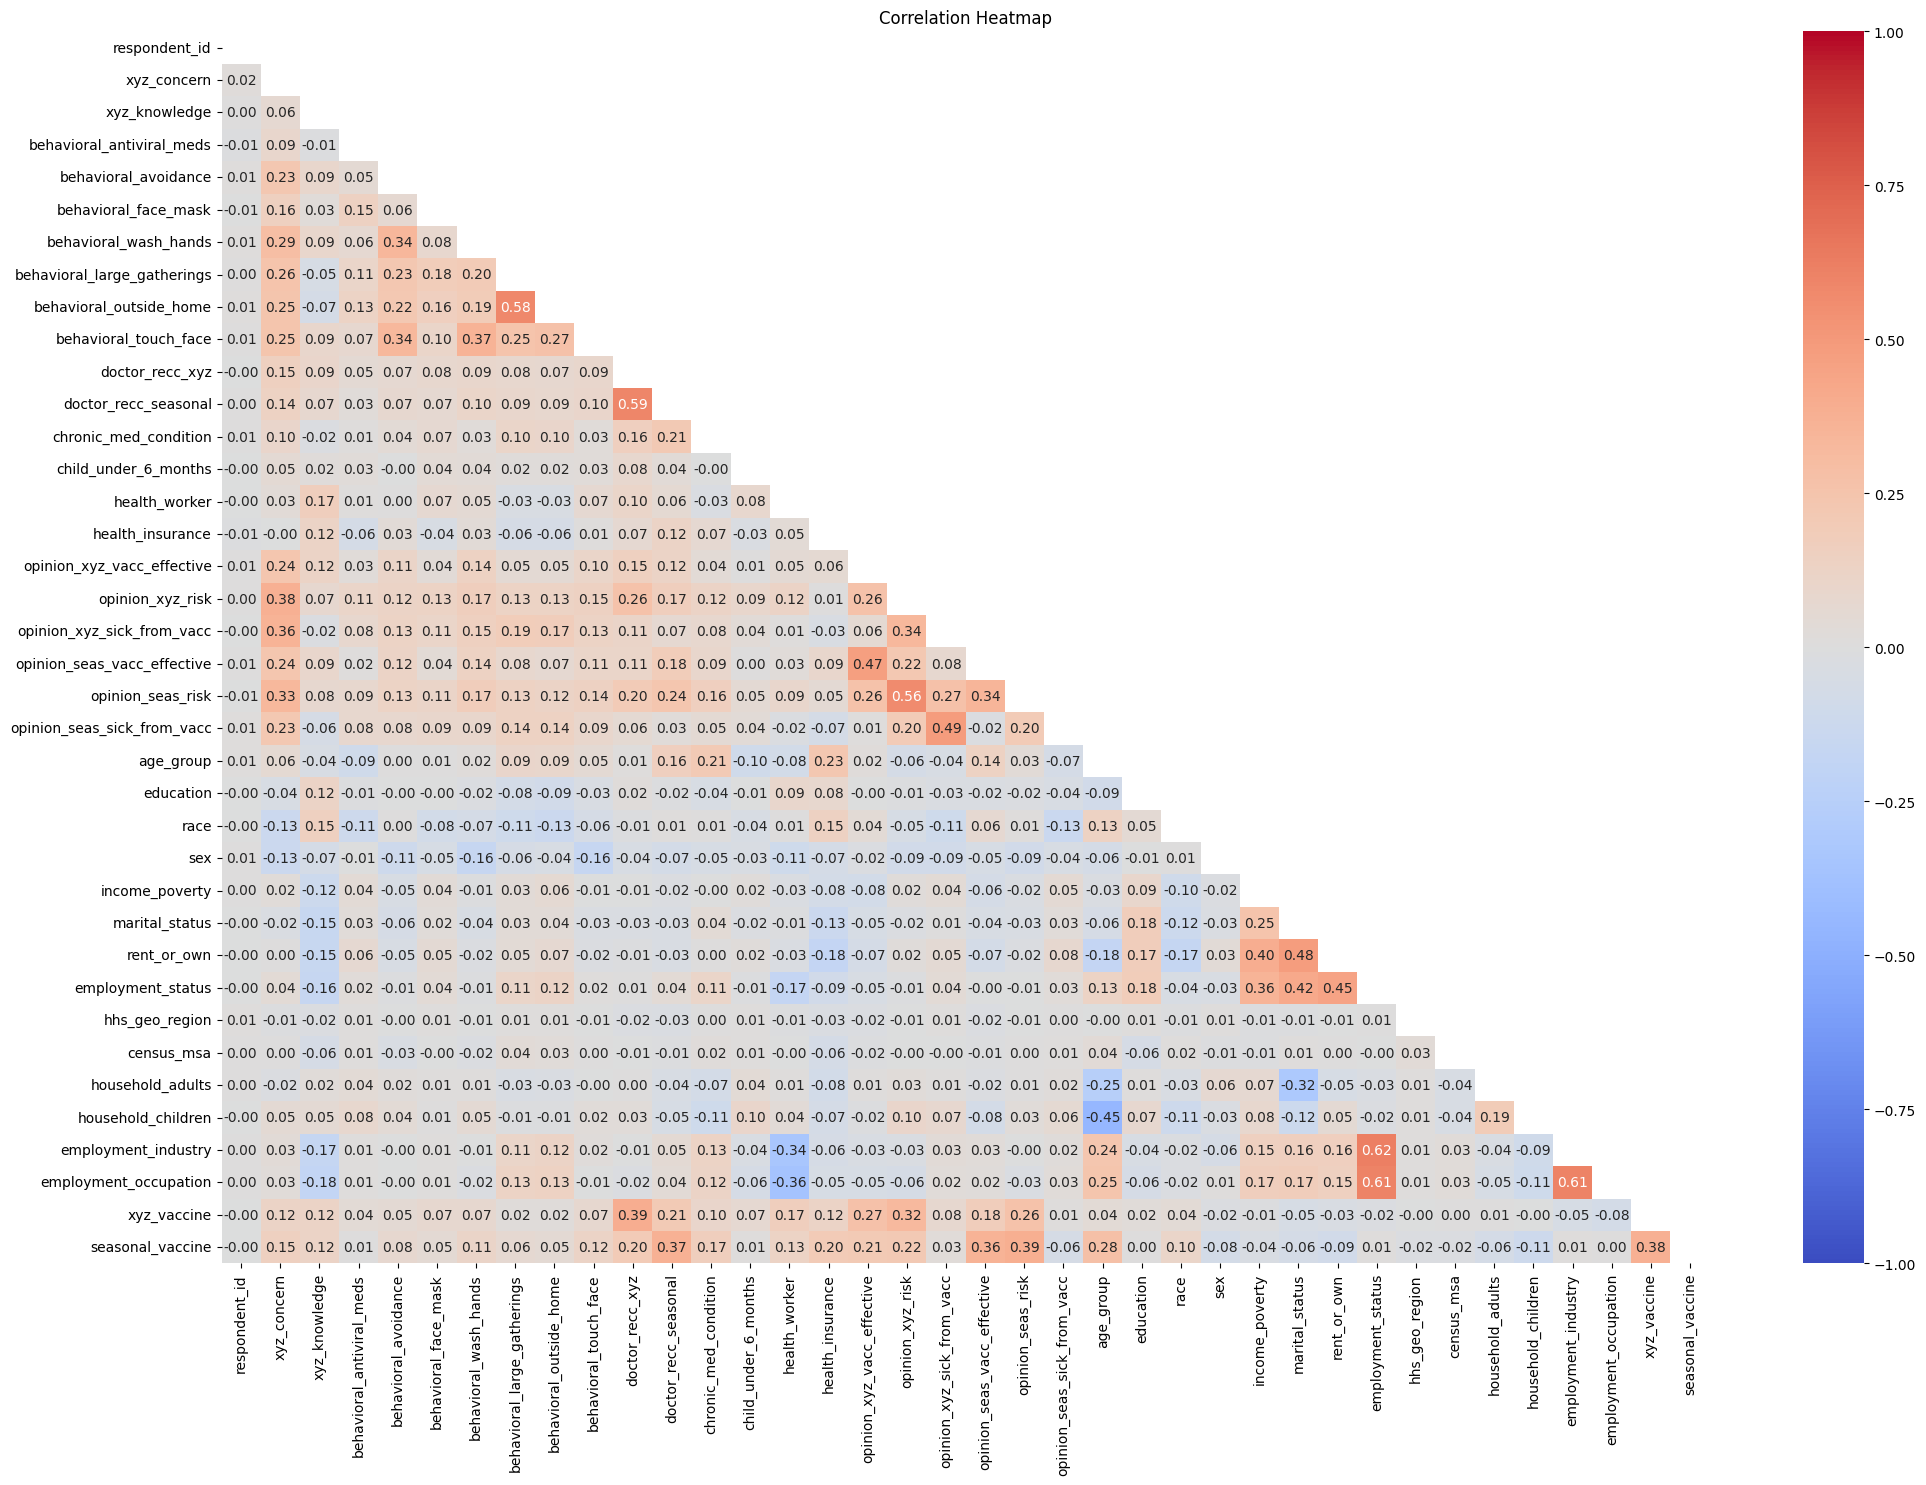

In [54]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
                       'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']
fake_df = merged_train_df.copy()
for col in categorical_columns:
    fake_df[col] = label_encoder.fit_transform(fake_df[col])

# Compute the correlation matrix
corr_matrix = fake_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(24, 16))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


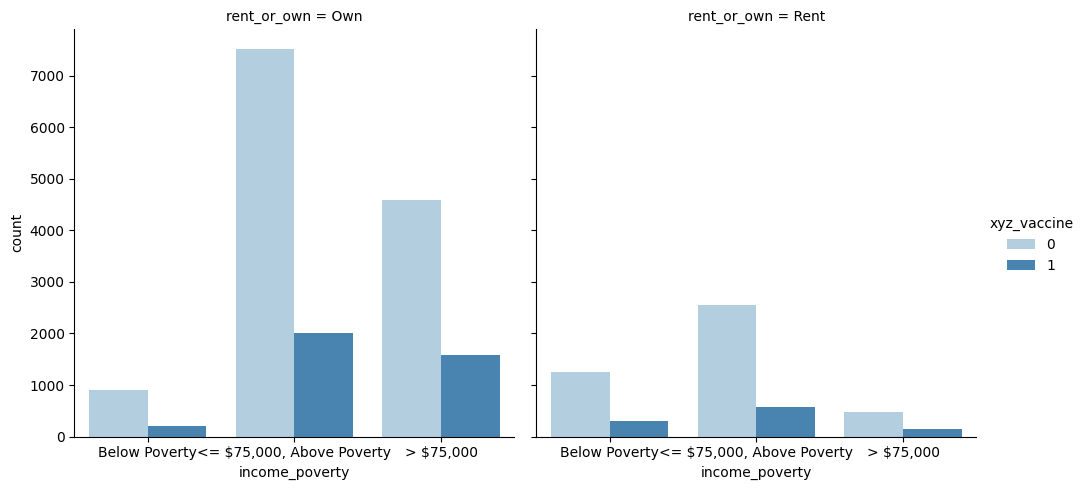

In [55]:
g = sns.catplot(x='income_poverty',col = "rent_or_own",hue='xyz_vaccine',
                data=merged_train_df,
                kind='count',palette='Blues'
                )
g.figure.subplots_adjust(wspace=.05, hspace=.02)

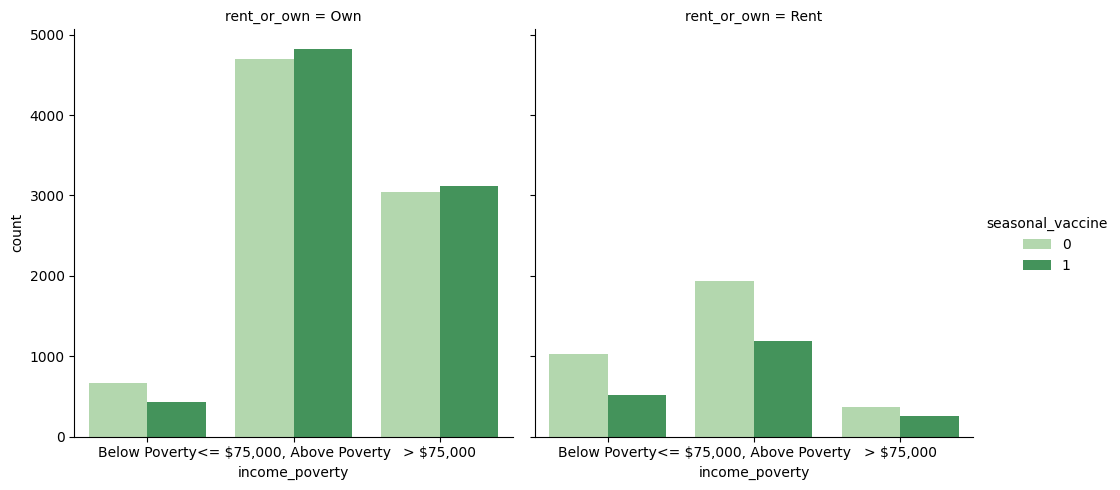

In [56]:
g = sns.catplot(x="income_poverty", col="rent_or_own",hue='seasonal_vaccine',
                data=merged_train_df,
                kind="count", palette='Greens'
                )
g.figure.subplots_adjust(wspace=.05, hspace=.02)

In [57]:
merged_train_df.isnull().sum().sort_values(ascending=False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_xyz_sick_from_vacc       395
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
household_adults                 249
household_children               249
behavioral_avoidance             208
behavioral_touch_face            128
xyz_knowledge                    116
xyz_concern                       92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [58]:
merged_train_df['employment_occupation'].fillna('other', inplace=True) #probably could add these to knn, but we'll try this first
merged_train_df['employment_industry'].fillna('other', inplace=True)
merged_train_df

C:\Users\Kunal Singh\AppData\Local\Temp\ipykernel_26444\247304403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_train_df['employment_occupation'].fillna('other', inplace=True) #probably could add these to knn, but we'll try this first
C:\Users\Kunal Singh\AppData\Local\Temp\ipykernel_26444\247304403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,other,other,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,other,other,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,other,other,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,other,other,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [59]:
merged_train_df.isnull().sum().sort_values(ascending=False)

health_insurance               12274
income_poverty                  4423
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_xyz_sick_from_vacc       395
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
xyz_knowledge                    116
xyz_concern                       92
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_antiviral_meds         71
behavioral_wash_hands             42
b

In [60]:
oridnal_cat = ['income_poverty','education','rent_or_own','marital_status','employment_status']
from sklearn.preprocessing import OrdinalEncoder

merged_train_df[oridnal_cat] = merged_train_df[oridnal_cat].apply(LabelEncoder().fit_transform)

In [61]:
from sklearn.impute import SimpleImputer

freq_cols = merged_train_df.columns[merged_train_df.isnull().sum() > 0].tolist()

for col in freq_cols:
    freq_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    temp = freq_imp.fit_transform(merged_train_df[[col]]).ravel()
    merged_train_df[col] = temp
merged_train_df.isnull().sum().sort_values(ascending=False)

respondent_id                  0
rent_or_own                    0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
employment_status              0
xyz_concern                    0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_industry            0
employment_occupation          0
xyz_vaccine                    0
opinion_seas_risk              0
opinion_seas_vacc_effective    0
opinion_xyz_sick_from_vacc     0
opinion_xyz_risk               0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_rec

In [62]:
temp = merged_train_df[['age_group', 'race', 'sex', 'census_msa']].copy()
for col in temp.columns.tolist():
    label_encoder = LabelEncoder()
    temp[col] = label_encoder.fit_transform(temp[col])
    
merged_train_df.drop(columns=['age_group', 'race', 'sex', 'census_msa'], inplace=True)
merged_train_df = pd.concat([temp, merged_train_df], axis=1)

print(merged_train_df.shape)
merged_train_df.head()

(26707, 38)


,age_group,race,sex,census_msa,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,...,marital_status,rent_or_own,employment_status,hhs_geo_region,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,3,3,0,2,0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,oxchjgsf,0.0,0.0,other,other,0,0
1,1,3,1,0,1,3.0,2.0,0.0,1.0,0.0,...,1,1,0,bhuqouqj,0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,0,3,1,0,2,1.0,1.0,0.0,1.0,0.0,...,1,0,0,qufhixun,2.0,0.0,rucpziij,xtkaffoo,0,0
3,4,3,0,1,3,1.0,1.0,0.0,1.0,0.0,...,1,1,1,lrircsnp,0.0,0.0,other,other,0,1
4,2,3,0,0,4,2.0,1.0,0.0,1.0,0.0,...,0,0,0,qufhixun,1.0,0.0,wxleyezf,emcorrxb,0,0


In [63]:
merged_train_df.drop(columns='respondent_id', inplace=True)

In [64]:
temp = merged_train_df[['hhs_geo_region', 'employment_industry', 'employment_occupation']].copy() #perhaps we can labelencode hhs_geo_region, employment_industry, employment_occupation
for col in temp.columns.tolist():
    label_encoder = LabelEncoder()
    temp[col] = label_encoder.fit_transform(temp[col])
merged_train_df.drop(columns=['hhs_geo_region', 'employment_industry', 'employment_occupation'], inplace=True)
merged_train_df = pd.concat([temp, merged_train_df], axis=1)
merged_train_df

,hhs_geo_region,employment_industry,employment_occupation,age_group,race,sex,census_msa,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,...,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,8,11,12,3,3,0,2,1.0,0.0,0.0,...,2.0,1,2,1,0,1,0.0,0.0,0,0
1,1,13,20,1,3,1,0,3.0,2.0,0.0,...,4.0,0,2,1,1,0,0.0,0.0,0,1
2,9,15,22,0,3,1,0,1.0,1.0,0.0,...,2.0,2,0,1,0,0,2.0,0.0,0,0
3,5,11,12,4,3,0,1,1.0,1.0,0.0,...,1.0,0,2,1,1,1,0.0,0.0,0,1
4,9,19,5,2,3,0,0,2.0,1.0,0.0,...,4.0,3,0,0,0,0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,9,11,12,4,3,0,2,2.0,0.0,0.0,...,2.0,3,0,1,0,1,0.0,0.0,0,0
26703,6,4,2,0,3,1,1,1.0,2.0,0.0,...,1.0,2,0,1,1,0,1.0,0.0,0,0
26704,6,11,12,3,3,0,0,2.0,2.0,0.0,...,2.0,3,3,1,0,3,0.0,0.0,0,1
26705,5,4,6,0,1,0,2,1.0,1.0,0.0,...,2.0,3,0,0,1,0,1.0,0.0,0,0


In [65]:
X, y = merged_train_df.loc[:, :'household_children'].copy(), merged_train_df.loc[:, 'xyz_vaccine':].copy()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.30, stratify=y) 
#stratify bcz of imbalanced dataset

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scales between 0 and 1, so it is suitable for this data. SS makes values negative.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
def plot_roc(y_true, y_score, label_name, ax, color=False):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    if color:
        ax.set_facecolor('lightblue')
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {metrics.roc_auc_score(y_true, y_score):.4f}"
    )

Running Model: Logistic Regression


C:\Users\Kunal Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Kunal Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Accuracy Score for Logistic Regression:  0.6699113939847747
Hamming Loss for Logistic Regression:  0.1923124922001747

Running Model: Categorical Naive Bayes
Accuracy Score for Categorical Naive Bayes:  0.6153750155996506
Hamming Loss for Categorical Naive Bayes:  0.23168601023337076

Running Model: Support Vector Machine
Accuracy Score for Support Vector Machine:  0.668538624734806
Hamming Loss for Support Vector Machine:  0.19449644327967053



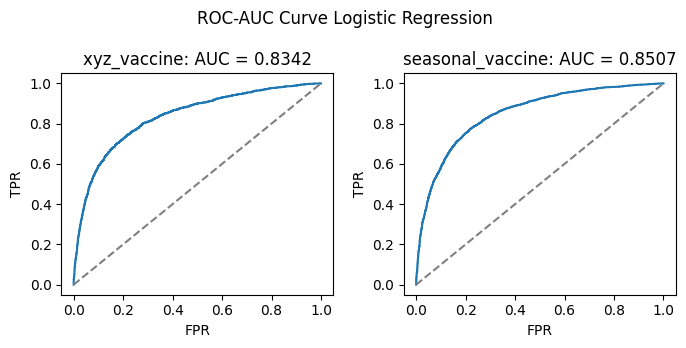

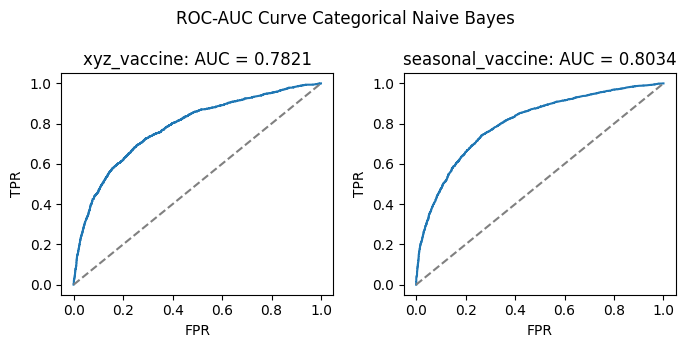

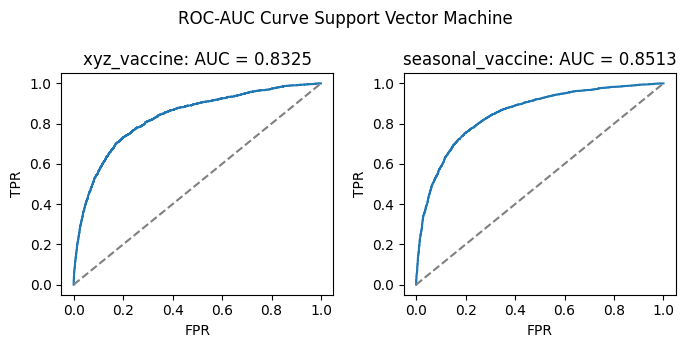

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC
from skmultilearn.problem_transform import BinaryRelevance
import sklearn.metrics as metrics

models = [('Logistic Regression', LogisticRegression(penalty = 'l2', C=0.1, solver='liblinear', n_jobs=-1)),('Categorical Naive Bayes', CategoricalNB()), ('Support Vector Machine', SVC(kernel='linear', C=0.1, probability=True))]

model_preds = []

for name, model in models:
    print(f"Running Model: {name}")
    clf = BinaryRelevance(model)
    clf.fit(X_train, y_train)
    
    preds = clf.predict(X_test)
    y_preds = clf.predict_proba(X_test).toarray()
    y_preds_both = pd.DataFrame({"xyz_vaccine":y_preds[:, 0], "seasonal_vaccine":y_preds[:, 1]}, index=y_test.index)

    fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))
    plt.suptitle(f"ROC-AUC Curve {name}")

    plot_roc(y_test['xyz_vaccine'], y_preds_both['xyz_vaccine'], 'xyz_vaccine',ax=ax[0])
    plot_roc(y_test['seasonal_vaccine'], y_preds_both['seasonal_vaccine'], 'seasonal_vaccine',ax=ax[1])
    fig.tight_layout()
    
    print(f"Accuracy Score for {name}: ", metrics.accuracy_score(y_test, preds))
    print(f"Hamming Loss for {name}: ", metrics.hamming_loss(y_test, preds))
    print()

Submisiion file

In [91]:
model = LogisticRegression(penalty = 'l2', C=0.1, solver='liblinear', n_jobs=-1)

clf = BinaryRelevance(model)
clf.fit(X_train,y_train)

preds = clf.predict(X_test)
y_preds = clf.predict_proba(X_test).toarray()
y_preds_both = pd.DataFrame(y_preds, columns=['xyz_vaccine', 'seasonal_vaccine'], index=y_test.index)

C:\Users\Kunal Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Kunal Singh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


In [92]:
y_test

,xyz_vaccine,seasonal_vaccine
17726,0,1
18914,0,0
9817,0,0
18232,0,1
19893,0,0
...,...,...
960,0,0
3161,1,1
9316,1,1
26393,0,0


In [93]:
from scipy.sparse import csr_matrix


In [96]:
y_preds_both

,xyz_vaccine,seasonal_vaccine
17726,0.116268,0.197343
18914,0.042539,0.098585
9817,0.128167,0.112953
18232,0.018634,0.357083
19893,0.153864,0.320339
...,...,...
960,0.059816,0.237835
3161,0.447276,0.743644
9316,0.906520,0.936277
26393,0.184460,0.844132


In [102]:

respondent_ids = y_test.index

predictions_df = pd.DataFrame({
    'respondent_id': respondent_ids,
    'xyz_vaccine': y_preds_both['xyz_vaccine'].round(1),
    'seasonal_vaccine': y_preds_both['seasonal_vaccine'].round(1)
})

predictions_df.to_csv('vaccine_predictions2.csv', index=False)


In [98]:
preds_df = pd.DataFrame(preds.toarray(), columns=y_test.columns, index=y_test.index)
preds_df

,xyz_vaccine,seasonal_vaccine
17726,0,0
18914,0,0
9817,0,0
18232,0,0
19893,0,0
...,...,...
960,0,0
3161,0,1
9316,1,1
26393,0,1


In [99]:
metrics.roc_auc_score(y_test,preds_df)

0.7289748206006128